# Deep Learning A Z Recorrente - Múltiplas saídas

In [ ]:
!pip install tensorflow==2.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import tensorflow as tf
import sklearn

In [ ]:
np.__version__, pd.__version__, matplotlib.__version__, tf.__version__, sklearn.__version__

('1.25.2', '2.0.3', '3.7.1', '2.16.1', '1.2.2')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
base = pd.read_csv('petr4_treinamento.csv')
base = base.dropna()
base

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1240,2017-12-25,15.750000,15.750000,15.750000,15.750000,15.718563,0.0
1241,2017-12-26,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0
1242,2017-12-27,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0
1243,2017-12-28,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0


In [ ]:
base_treinamento = base.iloc[:, 1:2].values
base_valor_maximo = base.iloc[:, 2:3].values

In [ ]:
base_treinamento

array([[19.99    ],
       [19.809999],
       [20.33    ],
       ...,
       [15.99    ],
       [16.1     ],
       [16.1     ]])

In [ ]:
base_valor_maximo

array([[20.209999],
       [20.4     ],
       [20.620001],
       ...,
       [16.139999],
       [16.129999],
       [16.1     ]])

In [ ]:
normalizador = MinMaxScaler(feature_range=(0, 1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
base_valor_maximo_normalizada = normalizador.fit_transform(base_valor_maximo)

In [ ]:
base_treinamento_normalizada, base_valor_maximo_normalizada

(array([[0.76501938],
        [0.7562984 ],
        [0.78149225],
        ...,
        [0.57122093],
        [0.57655039],
        [0.57655039]]),
 array([[0.77266112],
        [0.78187106],
        [0.79253519],
        ...,
        [0.57537562],
        [0.57489089],
        [0.57343674]]))

In [ ]:
X = []
y1 = []
y2 = []
for i in range(90, 1242):
    X.append(base_treinamento_normalizada[i-90:i, 0])
    y1.append(base_treinamento_normalizada[i, 0])
    y2.append(base_valor_maximo_normalizada[i, 0])
X, y1, y2 = np.array(X), np.array(y1), np.array(y2)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
X.shape

(1152, 90, 1)

In [ ]:
y = np.column_stack((y1, y2))

In [ ]:
y

array([[0.76114341, 0.76490543],
       [0.76114341, 0.7746001 ],
       [0.77470935, 0.78090155],
       ...,
       [0.57122093, 0.57537562],
       [0.57655039, 0.57489089],
       [0.57655039, 0.57343674]])

In [ ]:
y.shape

(1152, 2)

In [ ]:
X.shape[1]

90

In [ ]:
regressor = Sequential()
regressor.add(InputLayer(shape=(X.shape[1], 1)))
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=2, activation='linear'))

In [ ]:
regressor.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [ ]:
regressor.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - loss: 0.0814 - mean_absolute_error: 0.2119
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 13s 220ms/step - loss: 0.0188 - mean_absolute_error: 0.1088
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - loss: 0.0144 - mean_absolute_error: 0.0920
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - loss: 0.0138 - mean_absolute_error: 0.0909
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - loss: 0.0114 - mean_absolute_error: 0.0828
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - loss: 0.0112 - mean_absolute_error: 0.0806
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - loss: 0.0116 - mean_absolute_error: 0.0816
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 442ms/step - loss: 0.0091 - mean_absolute_error: 0.0740
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 183ms/step - loss: 0.0110 - mean_absolute_error: 0.0794
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - loss: 0.0091 - mean_absolute_error: 0.0735
Epoch 11/100

In [ ]:
base_teste = pd.read_csv('petr4_teste.csv')
y_open = base_teste.iloc[:, 1:2].values
y_high = base_teste.iloc[:, 2:3].values

In [ ]:
y_open, y_high

(array([[16.190001],
        [16.49    ],
        [16.780001],
        [16.700001],
        [16.74    ],
        [17.030001],
        [16.92    ],
        [16.879999],
        [17.040001],
        [17.32    ],
        [17.35    ],
        [17.92    ],
        [18.35    ],
        [18.309999],
        [18.26    ],
        [18.4     ],
        [18.42    ],
        [19.34    ],
        [19.620001],
        [19.67    ],
        [19.77    ],
        [19.74    ]]),
 array([[16.549999],
        [16.719999],
        [16.959999],
        [16.860001],
        [17.030001],
        [17.16    ],
        [17.049999],
        [17.299999],
        [17.41    ],
        [17.440001],
        [17.84    ],
        [18.360001],
        [18.530001],
        [18.42    ],
        [18.469999],
        [18.459999],
        [19.629999],
        [19.34    ],
        [19.98    ],
        [20.049999],
        [19.77    ],
        [19.93    ]]))

In [ ]:
base_completa = pd.concat((base['Open'], base_teste['Open']), axis=0)
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1, 1)
entradas = normalizador.transform(entradas)

In [ ]:
entradas

array([[0.46825012],
       [0.46000969],
       [0.46146389],
       [0.44886088],
       [0.46437227],
       [0.46970431],
       [0.4992729 ],
       [0.50315075],
       [0.5210858 ],
       [0.52496365],
       [0.51429956],
       [0.51914687],
       [0.51720795],
       [0.52157053],
       [0.52350945],
       [0.5210858 ],
       [0.52496365],
       [0.53223461],
       [0.56131847],
       [0.54920019],
       [0.55841008],
       [0.5618032 ],
       [0.5540475 ],
       [0.53805138],
       [0.54435288],
       [0.52932622],
       [0.54920019],
       [0.56374212],
       [0.56277266],
       [0.55210858],
       [0.54968492],
       [0.57489089],
       [0.57682986],
       [0.57246728],
       [0.57973825],
       [0.57634513],
       [0.57537562],
       [0.57925347],
       [0.56858943],
       [0.57779937],
       [0.58264668],
       [0.58264668],
       [0.59428022],
       [0.6063985 ],
       [0.60591372],
       [0.61560829],
       [0.61221522],
       [0.616

In [ ]:
X_teste = []
for i in range(90, 112):
    X_teste.append(entradas[i-90:i, 0])
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

In [ ]:
X_teste

array([[[0.46825012],
        [0.46000969],
        [0.46146389],
        ...,
        [0.5681047 ],
        [0.57343674],
        [0.57343674]],

       [[0.46000969],
        [0.46146389],
        [0.44886088],
        ...,
        [0.57343674],
        [0.57343674],
        [0.57779937]],

       [[0.46146389],
        [0.44886088],
        [0.46437227],
        ...,
        [0.57343674],
        [0.57779937],
        [0.59234125]],

       ...,

       [[0.54920019],
        [0.55841008],
        [0.5618032 ],
        ...,
        [0.68589433],
        [0.73048958],
        [0.74406209]],

       [[0.55841008],
        [0.5618032 ],
        [0.5540475 ],
        ...,
        [0.73048958],
        [0.74406209],
        [0.7464857 ]],

       [[0.5618032 ],
        [0.5540475 ],
        [0.53805138],
        ...,
        [0.74406209],
        [0.7464857 ],
        [0.75133301]]])

In [ ]:
previsoes = regressor.predict(X_teste)
previsoes = normalizador.inverse_transform(previsoes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


In [ ]:
previsoes

array([[15.987308, 16.158867],
       [16.074902, 16.246805],
       [16.164248, 16.337368],
       [16.294624, 16.470282],
       [16.440285, 16.618567],
       [16.567455, 16.747671],
       [16.688719, 16.870817],
       [16.785912, 16.969454],
       [16.840147, 17.024467],
       [16.870913, 17.056028],
       [16.926306, 17.11318 ],
       [17.014774, 17.203966],
       [17.183943, 17.37673 ],
       [17.46025 , 17.6579  ],
       [17.777514, 17.979368],
       [18.045084, 18.24911 ],
       [18.228188, 18.432884],
       [18.325375, 18.530134],
       [18.46564 , 18.673023],
       [18.70722 , 18.919754],
       [19.005926, 19.223913],
       [19.29246 , 19.51464 ]], dtype=float32)

In [ ]:
y_open

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [ ]:
y_high

array([[16.549999],
       [16.719999],
       [16.959999],
       [16.860001],
       [17.030001],
       [17.16    ],
       [17.049999],
       [17.299999],
       [17.41    ],
       [17.440001],
       [17.84    ],
       [18.360001],
       [18.530001],
       [18.42    ],
       [18.469999],
       [18.459999],
       [19.629999],
       [19.34    ],
       [19.98    ],
       [20.049999],
       [19.77    ],
       [19.93    ]])

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_open.ravel(), previsoes[:,0]))
print(mean_absolute_error(y_high.ravel(), previsoes[:,1]))

0.5496734027127353
0.6311393896317916


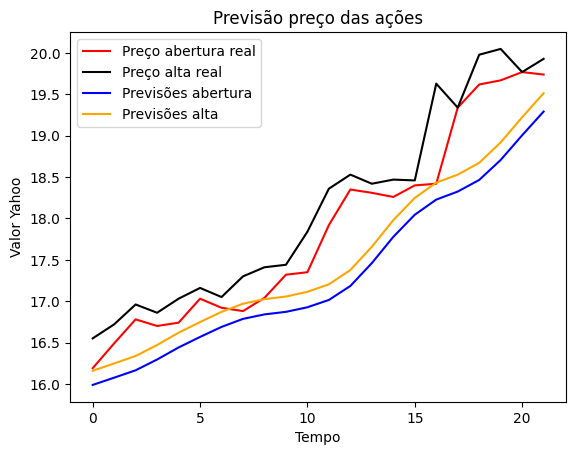

In [ ]:
plt.plot(y_open, color = 'red', label = 'Preço abertura real')
plt.plot(y_high, color = 'black', label = 'Preço alta real')

plt.plot(previsoes[:, 0], color = 'blue', label = 'Previsões abertura')
plt.plot(previsoes[:, 1], color = 'orange', label = 'Previsões alta')

plt.title('Previsão preço das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend();